In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Se está trabajando en la rama testgh by @SOG


##### Se limpia un poco la base de datos

In [118]:
file_path = r"2002to2018.csv"  #2002to2016.csv
df = pd.read_csv(file_path)
# df = df.sort_values(by='duration.s', ascending=False).reset_index(drop=True)
# formatT = '%Y-%m-%d %H:%M:%S'

df['Datetime'] = pd.to_datetime(df['start.date'] +
                                ' ' + 
                                df['start.time'])
df = df.set_index(pd.DatetimeIndex(df['Datetime']))
del df['flare']
del df['start.date']
del df['start.time']
del df['Datetime']


def filtro(data, Lbanderas): # Filtro por bandera, se podría agregar que eliminara también el rango de energía 3-6 keV
    for bandera in Lbanderas: 
        ## filter
        data = data[data['flag.1'] != bandera]
        
        data = data[data['flag.2'] != bandera]

        data = data[data['flag.3'] != bandera]
        
        data = data[data['flag.4'] != bandera]

        values = data['flag.5'].values
        lfilter = [i for i in list(values[pd.notnull(values)]) if bandera in i]
        data = data[~data['flag.5'].isin(lfilter)]
            
    return data
df

,peak,end,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,flag.3,flag.4,flag.5
Datetime,,,,,,,,,,,,,,,
2002-02-12 21:29:56,21:33:38,21:41:48,712,136,167304.0,12-25,592,-358,692,0,A1,P1,NaN,NaN,NaN
2002-02-12 21:44:08,21:45:06,21:48:56,288,7,9504.0,6-12,604,-341,694,9811,A1,P1,PE,Q1,NaN
2002-02-13 00:53:24,00:54:54,00:57:00,216,15,11448.0,6-12,-310,375,487,9825,A1,P1,NaN,NaN,NaN
2002-02-13 04:22:52,04:23:50,04:26:56,244,20,17400.0,12-25,-277,378,469,9822,A1,P1,NaN,NaN,NaN
2002-02-13 07:03:52,07:05:14,07:07:48,236,336,313392.0,25-50,-272,390,476,9825,A1,GS,P1,PE,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-09 16:41:28,16:42:54,16:43:32,124,18,2888.0,6-12,-345,-38,347,2699,A0,DF,P1,PE,Q2
2018-02-09 18:15:56,18:17:26,18:17:40,104,16,1656.0,6-12,-268,-38,271,2699,A0,DF,P1,PE,Q2
2018-02-10 13:04:36,13:06:46,13:07:04,148,15,2224.0,6-12,-115,-38,121,2699,A0,DF,P1,PE,Q2


<AxesSubplot:>

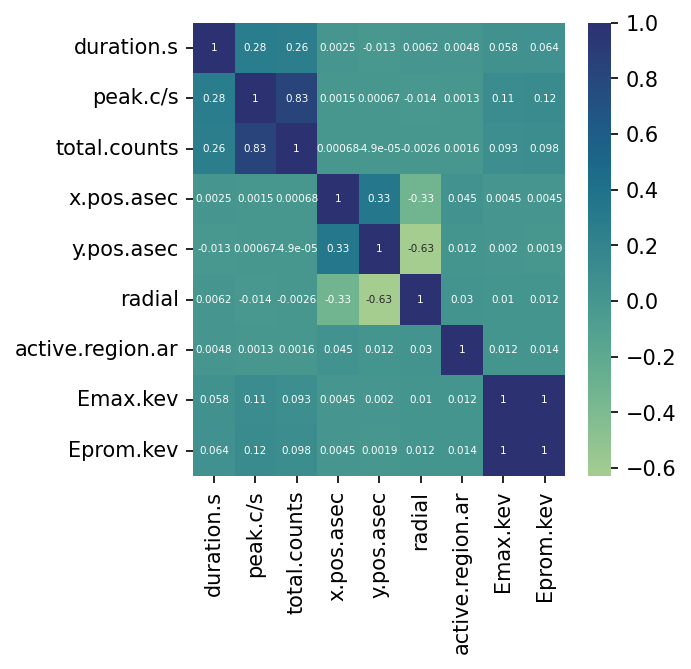

In [120]:
## CALCULO DE ENERGIAS

Emax = []
Eprom = []
for i in df['energy.kev']:
    result = re.findall(r'[\d\.\d]+', i)
    Emax.append(float(result[1]))
    Eprom.append((float(result[0]) + float(result[1]))/2)

df['Emax.kev'] = Emax
df['Eprom.kev'] = Eprom

plt.figure(figsize=(4,4), dpi = 150)
matriz=df.corr(method='pearson')
sns.heatmap(matriz,cmap='crest',annot=True, annot_kws={'fontsize':5})

## Histogramas
##### Se muestra la distribución de las erupciones en la superficie solar junto al histograma de la posición para cada ***(x,y)***

ok


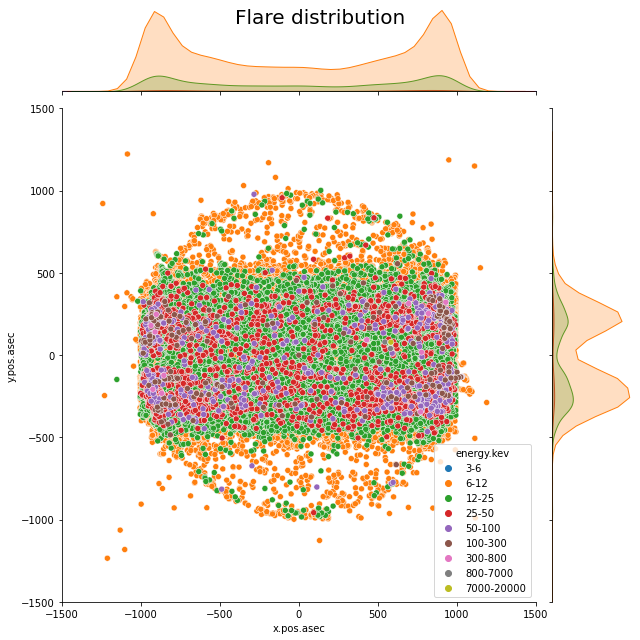

In [121]:
sns.jointplot(data=df.sort_values('Eprom.kev'), x='x.pos.asec', y='y.pos.asec', hue='energy.kev', kind='scatter', height=9, 
              xlim=(-1500, 1500), ylim=(-1500, 1500)).fig.suptitle('Flare distribution', fontsize=20)
plt.savefig('G1.png', dpi = 300)
print('ok')

#### Histograma de rango de energías

<AxesSubplot:xlabel='energy.kev', ylabel='count'>

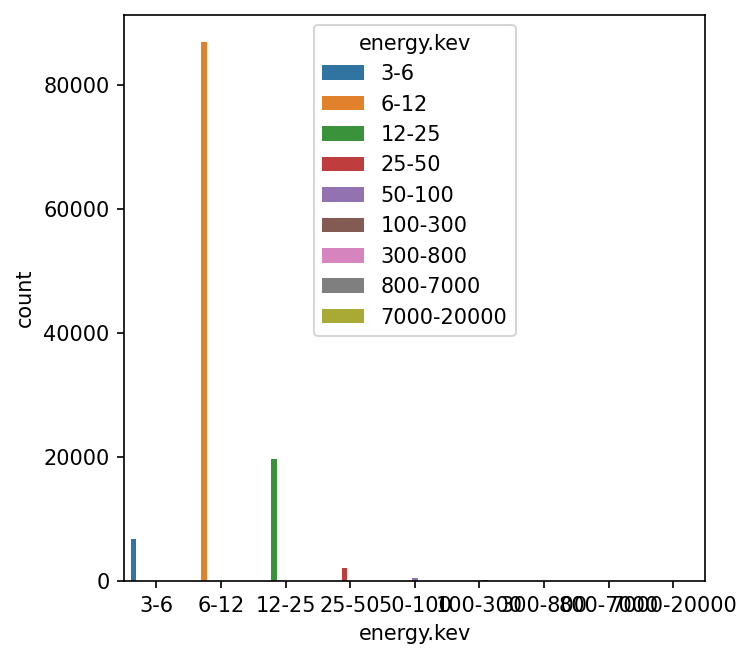

In [123]:
#### To Do: Estadística con los datos

energy = df['energy.kev'] == '12-25' # Se filtra por rango de energias
dfenergy = df[energy]

datos = dfenergy['y.pos.asec'] 
datos.describe()


plt.figure(figsize=(5,5), dpi = 150)
sns.countplot(data=df.sort_values('Eprom.kev'), x="energy.kev", hue='energy.kev')
# df.describe()

,duration.s,peak.c/s,total.counts,x.pos.asec,y.pos.asec,radial,active.region.ar,Emax.kev,Eprom.kev
count,116143.000000,116143.000000,1.161430e+05,116143.000000,116143.000000,116143.000000,116143.000000,116143.000000,116143.000000
mean,493.643009,215.086617,3.768843e+05,-7.681625,-42.185495,687.896989,990.071550,15.798257,11.718171
std,434.131763,839.382841,3.048797e+06,755.773503,401.904509,511.364382,1351.853636,67.634900,44.361745
min,8.000000,0.000000,8.000000e+00,-10012.000000,-10005.000000,0.000000,0.000000,6.000000,4.500000
25%,212.000000,28.000000,2.284000e+04,-701.000000,-247.000000,467.000000,0.000000,12.000000,9.000000
50%,364.000000,56.000000,5.856000e+04,0.000000,-71.000000,759.000000,691.000000,12.000000,9.000000
75%,628.000000,144.000000,1.798080e+05,708.000000,198.000000,946.000000,1564.000000,12.000000,9.000000
max,4444.000000,113156.000000,4.355501e+08,1190.000000,1223.000000,14154.000000,9999.000000,20000.000000,13500.000000


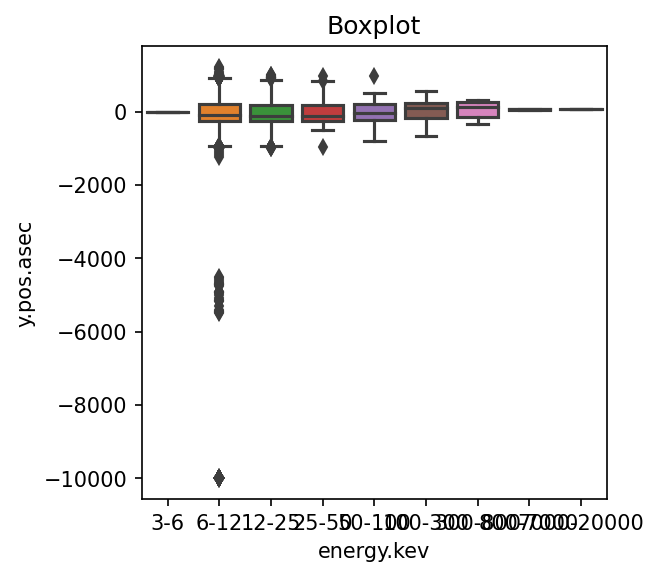

In [102]:
plt.figure(figsize=(4,4), dpi = 150)
sns.boxplot(data=df.sort_values('Eprom.kev'), x='energy.kev', y="y.pos.asec")
plt.title('Boxplot')
df.describe()

Text(0.5, 0, 'log(duration.s)')

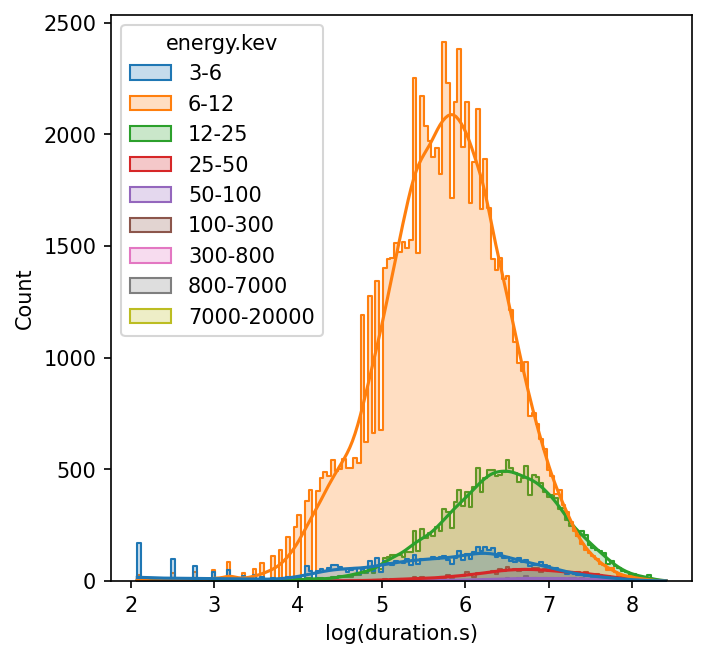

In [105]:
df['duration.sl'] = np.log(df['duration.s'])

plt.figure(figsize=(5,5), dpi = 150)
sns.histplot(data=df.sort_values('Eprom.kev'), x='duration.sl', hue='energy.kev', element="step", kde=True)
plt.xlabel('log(duration.s)')
# plt.legend(df.value_counts('energy.kev', ascending=True).index, loc = 'upper left')

C:\Users\santi\anaconda\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


,duration.s,peak.c/s,total.counts,x.pos.asec,y.pos.asec,radial,active.region.ar,Emax.kev,Eprom.kev,duration.sl
count,116143.000000,116143.000000,1.161430e+05,116143.000000,116143.000000,116143.000000,116143.000000,116143.000000,116143.000000,116143.000000
mean,493.643009,215.086617,3.768843e+05,-7.681625,-42.185495,687.896989,990.071550,15.798257,11.718171,5.876659
std,434.131763,839.382841,3.048797e+06,755.773503,401.904509,511.364382,1351.853636,67.634900,44.361745,0.838296
min,8.000000,0.000000,8.000000e+00,-10012.000000,-10005.000000,0.000000,0.000000,6.000000,4.500000,2.079442
25%,212.000000,28.000000,2.284000e+04,-701.000000,-247.000000,467.000000,0.000000,12.000000,9.000000,5.356586
50%,364.000000,56.000000,5.856000e+04,0.000000,-71.000000,759.000000,691.000000,12.000000,9.000000,5.897154
75%,628.000000,144.000000,1.798080e+05,708.000000,198.000000,946.000000,1564.000000,12.000000,9.000000,6.442540
max,4444.000000,113156.000000,4.355501e+08,1190.000000,1223.000000,14154.000000,9999.000000,20000.000000,13500.000000,8.399310


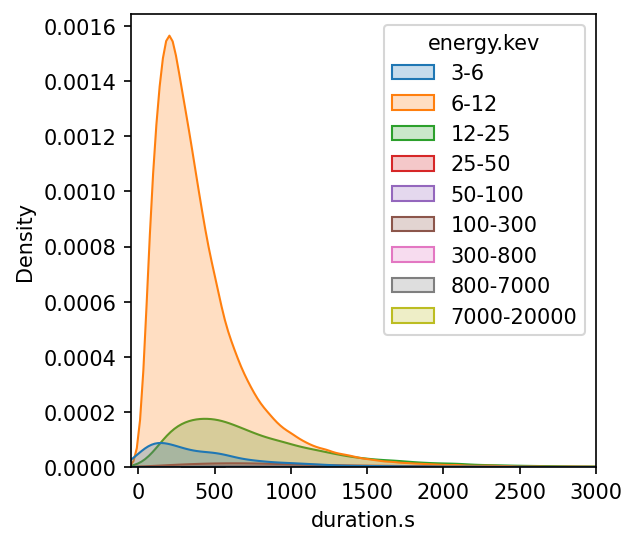

In [106]:
plt.figure(figsize=(4,4), dpi = 150)
sns.kdeplot(data=df.sort_values('Eprom.kev'), x='duration.s', hue='energy.kev', fill=True)
plt.xlim(-50,3000)
df.describe()

Text(0.5, 1.0, 'Boxplot')

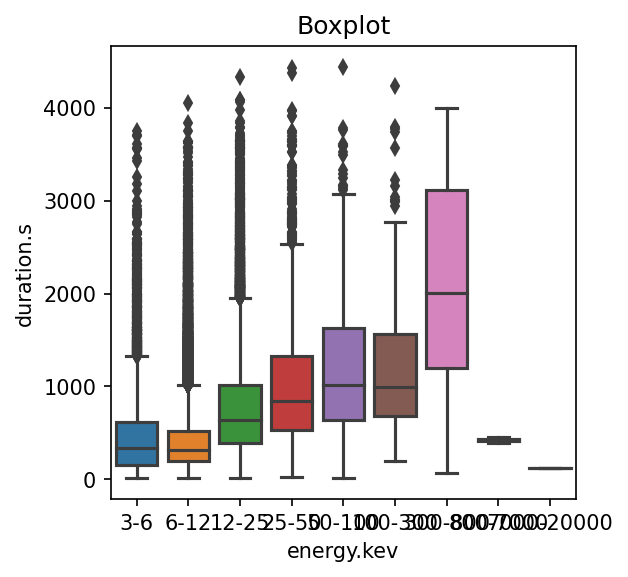

In [107]:
plt.figure(figsize=(4,4), dpi = 150)
sns.boxplot(data=df.sort_values('Eprom.kev'), x='energy.kev', y="duration.s")
plt.title('Boxplot')
# df.describe()

C:\Users\santi\anaconda\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


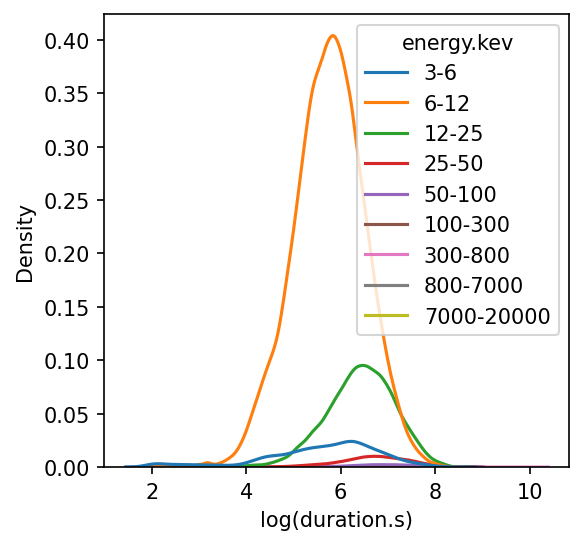

In [108]:
plt.figure(figsize=(4,4), dpi = 150)

df['duration.ls'] = np.log(df['duration.s'])
sns.kdeplot(data=df.sort_values('Eprom.kev'), x='duration.ls', hue='energy.kev') 
plt.xlabel('log(duration.s)')
del df['duration.ls']

### Datos nulos y filtrado
##### Se filtran los posibles 

peak                    0
end                     0
duration.s              0
peak.c/s                0
total.counts            0
energy.kev              0
x.pos.asec              0
y.pos.asec              0
radial                  0
active.region.ar        0
flag.1                  0
flag.2                  0
flag.3              19907
flag.4              20202
flag.5              61180
Emax.kev                0
Eprom.kev               0
dtype: int64

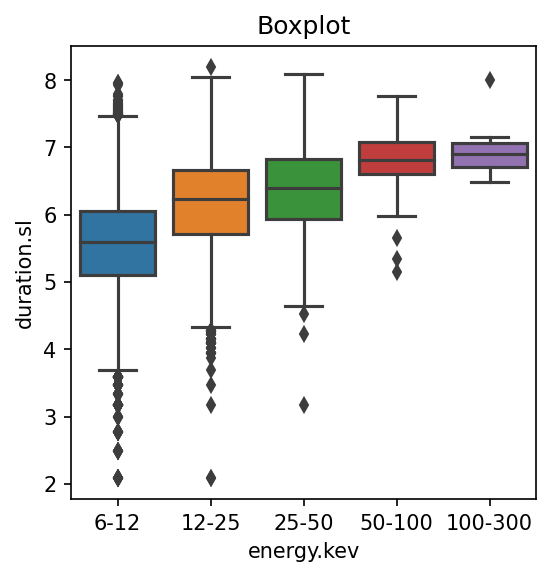

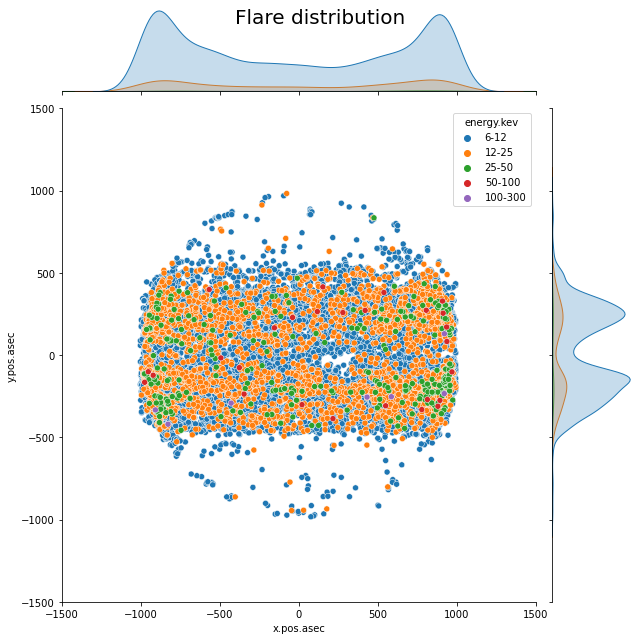

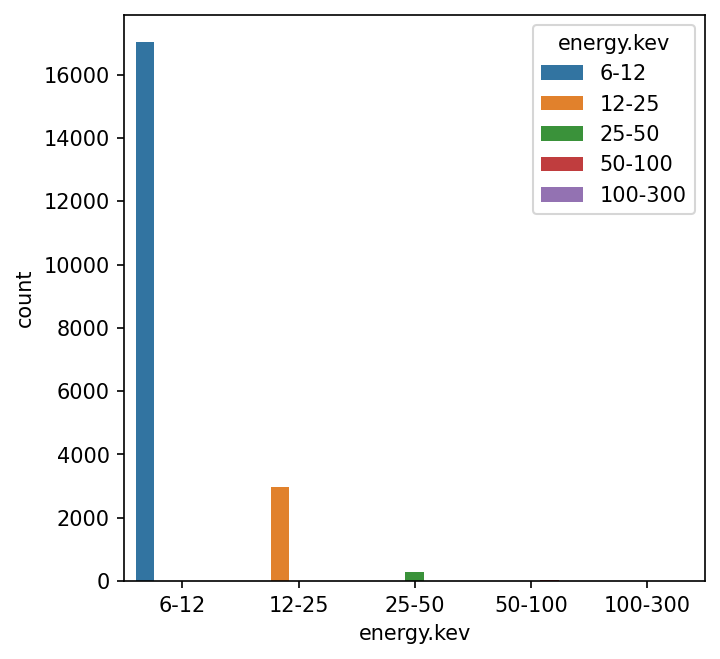

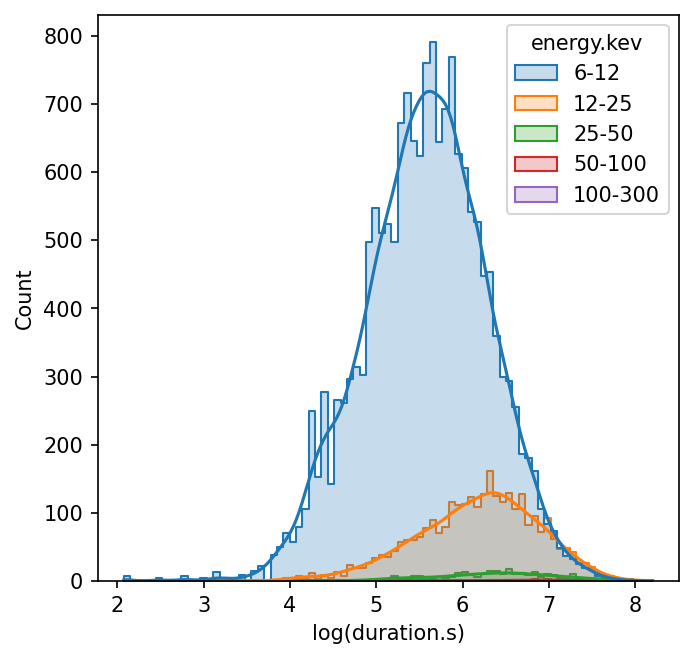

In [101]:
lista = ['NS','SD','SS','DF','DR','ED','ES','FE','FR','FS','GD','GE','GS','MR','P0','PS','PE']
dataFiltro = filtro(df, lista)
dataFiltro

dataFiltro['duration.sl'] = np.log(dataFiltro['duration.s'])

plt.figure(figsize=(4,4), dpi = 150)
sns.boxplot(data=dataFiltro.sort_values('Eprom.kev'), x='energy.kev', y="duration.sl")
plt.title('Boxplot')
df.describe()

sns.jointplot(data=dataFiltro.sort_values('Eprom.kev'), x='x.pos.asec', y='y.pos.asec', hue='energy.kev', kind='scatter', height=9, 
              xlim=(-1500, 1500), ylim=(-1500, 1500)).fig.suptitle('Flare distribution', fontsize=20)

plt.figure(figsize=(5,5), dpi = 150)
sns.countplot(data=dataFiltro.sort_values('Eprom.kev'), x="energy.kev", hue='energy.kev')


plt.figure(figsize=(5,5), dpi = 150)
sns.histplot(data=dataFiltro.sort_values('Eprom.kev'), x='duration.sl', hue='energy.kev', element="step", kde=True)
plt.xlabel('log(duration.s)')


df.isnull().sum()